In [57]:
import numpy as np
import pandas as pd

In [58]:
df = pd.read_csv('feature_selection.csv')

In [59]:
df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0,36,3.0,2.0,2,1,850.0,0.0,0.0,0.0,1,1,0.82
1,0,95,2.0,2.0,2,1,1226.0,1.0,0.0,0.0,1,2,0.95
2,0,103,2.0,2.0,1,1,1000.0,0.0,0.0,0.0,1,0,0.32
3,0,99,3.0,4.0,4,3,1615.0,1.0,0.0,1.0,0,2,1.60
4,0,5,2.0,2.0,1,3,582.0,0.0,1.0,0.0,0,2,0.48


In [60]:
#ordinal_encoding -> one hot encoding
X = df.drop(columns = ['price'])
y = df['price']

In [61]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

In [62]:
col_enc = ['sector','balcony','agePossession','furnishing_type','luxury_category','floor_category']

C:\Users\debas\AppData\Local\Temp\ipykernel_18536\2237545488.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


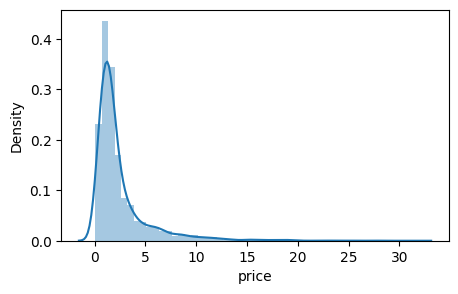

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
sns.distplot(y)
plt.show()

C:\Users\debas\AppData\Local\Temp\ipykernel_18536\1463717267.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_new)


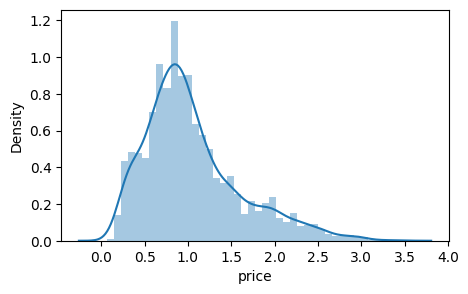

In [64]:
y_new = np.log1p(y)
plt.figure(figsize=(5,3))
sns.distplot(y_new)
plt.show()

In [65]:
#col transfer
preprocessor = ColumnTransformer(
    transformers = [
        ('num',StandardScaler(),['property_type','bedRoom','bathroom','built_up_area','servant room','store room']),
        ('cat',OneHotEncoder(drop='first'),col_enc)
    ],
    remainder = 'passthrough'
)

In [66]:
#pipeline using svm
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('regressor',SVR(kernel='rbf'))
])

In [67]:
#cross_val
kfold = KFold(n_splits = 10,shuffle=True,random_state=42)
scores = cross_val_score(pipeline,X,y_new,cv=kfold,scoring='r2')

In [68]:
scores.mean()

0.8845360715052786

In [69]:
scores.std()

0.014784881452420021

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y_new,test_size=0.2,random_state=42)

In [71]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', SVR())])

In [72]:
y_pred = pipeline.predict(x_test)

In [73]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test),np.expm1(y_pred)) # expm1 = e^x-1

0.5324591082613233